In [1]:
# the solution for 数理手法Ⅷ 11/6
#Load some module
import numpy as np #matrix computation 
import matplotlib.pyplot as plt # draw picture
from scipy.optimize import minimize # to get r

#Ridge Regression
def ridge_regression(X, y, lambd): #X is the matrix of the independent data, y is the vector of the depedent variable
    XTX = X.T*X
    m, _ = XTX.shape
    I = np.matrix(np.eye(m)) # unit matrix with rank equals to the number of the parameters (which are estimated) 
    w = (XTX + lambd*I).I*X.T*y # Use matrix to express L+sum(lambd*w)
    return w
#LASSO Regression

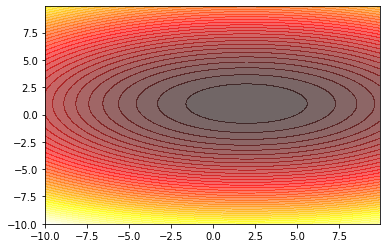

In [2]:
#build raw data
X = []
y = []
L = lambda i,j:i**2-4*i+4*j**2-8*j+10 #original function L
for i in range(0,10):
    for j in range(0,10):
        X.append([(i*0.1)**2,i*0.1,(j*0.1)**2,j*0.1,1]) #inculding x,y,x^2,y^2 and the constant
        y.append(L(i*0.1,j*0.1))
X = np.matrix(X)
y = np.matrix(y).T #from row vector to column vector

#draw contours of L
Axis_X,Axis_Y = np.meshgrid(np.arange(-10,10,0.1),np.arange(-10,10,0.1))
plt.contourf(Axis_X,Axis_Y,L(Axis_X,Axis_Y),50, alpha = 0.6, cmap = plt.cm.hot)

In [3]:
lambdaList = [0]+ ([10**i for i in range(0,6)])
for l in lambdaList:
    Coef = ridge_regression(X,y,l) #Verify the ridge regression
    print("When lambda is {},\nthe coefficient of x^2 is {},\nthe coefficient of x is {},\nthe coefficient of y^2 is {},\nthe coefficient of y is {},\nthe constant is {}\n".format(
        l
        ,round(Coef.tolist()[0][0],2)
        ,round(Coef.tolist()[1][0],2)
        ,round(Coef.tolist()[2][0],2)
        ,round(Coef.tolist()[3][0],2)
        ,round(Coef.tolist()[4][0],2)
    ))

When lambda is 0,
the coefficient of x^2 is 1.0,
the coefficient of x is -4.0,
the coefficient of y^2 is 4.0,
the coefficient of y is -8.0,
the constant is 10.0

When lambda is 1,
the coefficient of x^2 is -1.16,
the coefficient of x is -1.43,
the coefficient of y^2 is -0.92,
the coefficient of y is -2.78,
the constant is 8.42

When lambda is 10,
the coefficient of x^2 is -0.44,
the coefficient of x is 0.21,
the coefficient of y^2 is -0.7,
the coefficient of y is -0.28,
the constant is 5.8

When lambda is 100,
the coefficient of x^2 is 0.42,
the coefficient of x is 0.8,
the coefficient of y^2 is 0.35,
the coefficient of y is 0.71,
the constant is 2.56

When lambda is 1000,
the coefficient of x^2 is 0.12,
the coefficient of x is 0.21,
the coefficient of y^2 is 0.12,
the coefficient of y is 0.2,
the constant is 0.52

When lambda is 10000,
the coefficient of x^2 is 0.01,
the coefficient of x is 0.02,
the coefficient of y^2 is 0.01,
the coefficient of y is 0.02,
the constant is 0.06

When 

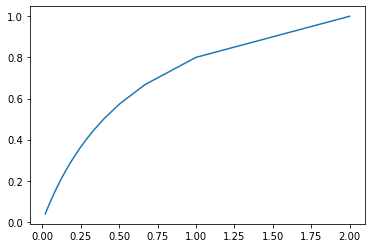

In [168]:
#draw the r* with different lambda
Axis_X,Axis_Y = [],[]
for i in range(0,100):
    fun = lambda x_value,w_x,w_y: w_x*x_value[0]**2-4*x_value[0]+w_y*x_value[1]**2-8*x_value[1]+10 #rebuild the model to compute r easily for different lambda
    res = minimize(fun,np.array([0,0]),args=(1+i,4+i), method='Nelder-Mead')
    #print("r* is ({},{})".format(round(res.x[0],2),round(res.x[1],2)))
    Axis_X.append(res.x[0])
    Axis_Y.append(res.x[1])
plt.plot(Axis_X,Axis_Y)

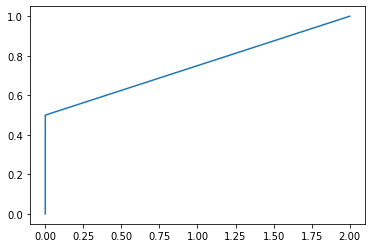

In [174]:
Axis_X,Axis_Y = [],[]
for i in range(0,100):
    fun = lambda x_value,i: x_value[0]**2-4*x_value[0]+4*x_value[1]**2-8*x_value[1]+10+i*abs(x_value[0])+i*abs(x_value[1]) #rebuild the model to compute r easily for different lambda
    res = minimize(fun,np.array([0,0]),args=(i), method='Nelder-Mead')
    #print("r* is ({},{})".format(round(res.x[0],2),round(res.x[1],2)))
    Axis_X.append(res.x[0])
    Axis_Y.append(res.x[1])
plt.plot(Axis_X,Axis_Y)